In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
1,Confederate statues are being pulled down acro...,1
2,Ever since George Floyd was killed by Minneapo...,2
3,There are videos of Eric Garner and George Flo...,3
4,"“Stop Killing Us!” Three words, scrawled on a ...",4
5,"A Minneapolis police officer, who was filmed k...",5
6,Our democracy hangs in the balance. This is no...,6
7,When George Floyd died under the knee of a Min...,7
8,Imagine that no one had shot video of George F...,8


In [4]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
!pip install textblob      

import textblob            
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
1,Confederate statues are being pulled down acro...,1,0.053973,0.485673
2,Ever since George Floyd was killed by Minneapo...,2,0.082898,0.389546
3,There are videos of Eric Garner and George Flo...,3,0.055775,0.441702
4,"“Stop Killing Us!” Three words, scrawled on a ...",4,0.004834,0.411234
5,"A Minneapolis police officer, who was filmed k...",5,0.026816,0.408475
6,Our democracy hangs in the balance. This is no...,6,0.063583,0.400948
7,When George Floyd died under the knee of a Min...,7,0.100006,0.442451
8,Imagine that no one had shot video of George F...,8,0.003220,0.393056


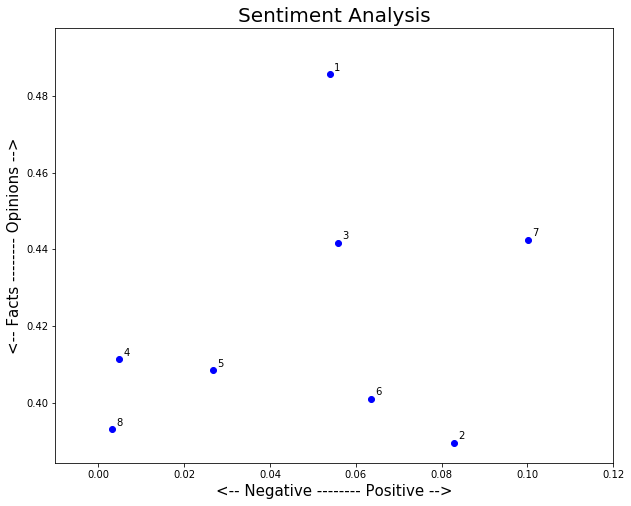

In [5]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [7]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [8]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
1,Confederate statues are being pulled down acro...,1,0.053973,0.485673
2,Ever since George Floyd was killed by Minneapo...,2,0.082898,0.389546
3,There are videos of Eric Garner and George Flo...,3,0.055775,0.441702
4,"“Stop Killing Us!” Three words, scrawled on a ...",4,0.004834,0.411234
5,"A Minneapolis police officer, who was filmed k...",5,0.026816,0.408475
6,Our democracy hangs in the balance. This is no...,6,0.063583,0.400948
7,When George Floyd died under the knee of a Min...,7,0.100006,0.442451
8,Imagine that no one had shot video of George F...,8,0.003220,0.393056


In [9]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Confederate statues are being pulled down across the South — from Birmingham, Ala., to Decatur, Ga., to Richmond, Va., the Confederacy’s former capital. The U.S. Navy and the Marines have banned public displays of the Confederate battle flag — as has NASCAR. Now, Congress is taking its own halting steps forward. On Thursday, the House speaker, Nancy Pelosi, announced that portraits of four former House',
  ' speakers who also served the Confederacy would be removed from display in the Capitol in observance of the Juneteenth holiday. (June 19 marks the day in 1865 when Union soldiers arrived in Galveston, Texas, with news of the end of slavery — two and a half years after the Emancipation Proclamation. It has come to be a more general celebration of liberation.) The portraits are of Robert M.T. Hunter of V',
  'irginia, who was speaker from 1839 to 1841 before serving in various high positions in the Confederacy, including secretary of state; Howell Cobb of Georgia, who was speaker f

In [10]:
# The list has 10 elements, one for each transcript
len(list_pieces)

8

In [11]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [12]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.08888888888888888,
  0.1277777777777778,
  0.10250000000000001,
  -0.2625,
  0.13636363636363635,
  -0.3111111111111111,
  0.3464285714285714,
  0.1,
  0.18148148148148147,
  0.1787878787878788],
 [0.1910714285714286,
  0.20138888888888887,
  -0.06,
  0.07187301587301588,
  0.16287878787878787,
  -0.09771148989898991,
  0.02340992340992341,
  0.0803030303030303,
  0.049735449735449744,
  0.22159090909090906],
 [-0.12402597402597403,
  -0.13333333333333333,
  -0.12927350427350429,
  0.36250000000000004,
  0.20737179487179488,
  -0.0006944444444444454,
  0.04861111111111111,
  0.19999999999999998,
  0.12272727272727271,
  0.017676767676767676],
 [0.019047619047619042,
  0.006666666666666665,
  0.030803571428571444,
  -0.11874999999999998,
  0.056666666666666664,
  -0.04040404040404041,
  0.018855218855218885,
  -0.23749999999999996,
  0.28125,
  0.14545454545454545],
 [-0.125,
  -0.1636904761904762,
  0.20555555555555557,
  0.08310606060606061,
  0.11440972222222222,
  0.075378787878

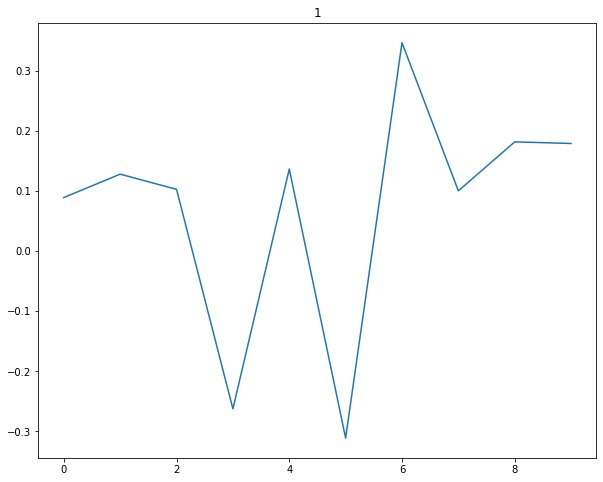

In [13]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

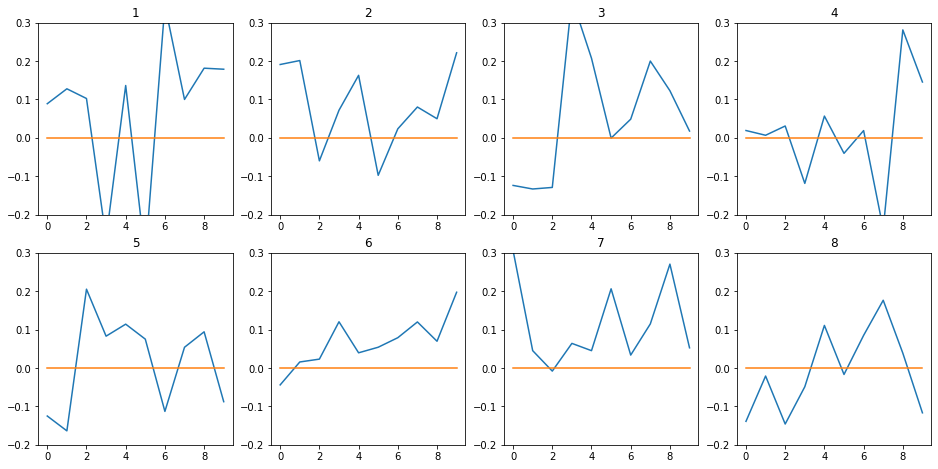

In [14]:
# Show the plot for all editorials
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()